# Loading the data

In [ ]:
!python3 -m ensurepip --upgrade
!python3 -m pip install pandas plotly

In [ ]:
!python3 -m pip install matplotlib numpy seaborn

In [1]:
import pandas as pd
import plotly.express as px

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [81]:
df = pd.read_csv("/Users/mariegeorgescudehillerin/Downloads/2024_spotify_top_100_cleaned.csv")

#Data Exploration

In [66]:
df.shape

(100, 21)

In [5]:
pd.DataFrame(df.columns, columns=["Column Names"])

,Column Names
0,track_id
1,track_name
2,track_artist
3,track_popularity
4,track_album_name
5,track_album_release_year
6,duration_min
7,Genres
8,record_label
9,danceability


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  100 non-null    object 
 1   track_name                100 non-null    object 
 2   track_artist              100 non-null    object 
 3   track_popularity          100 non-null    int64  
 4   track_album_name          100 non-null    object 
 5   track_album_release_year  100 non-null    int64  
 6   duration_min              100 non-null    float64
 7   Genres                    100 non-null    object 
 8   record_label              100 non-null    object 
 9   danceability              100 non-null    object 
 10  energy                    100 non-null    object 
 11  key_name                  100 non-null    object 
 12  loudness                  100 non-null    float64
 13  mode                      100 non-null    object 
 14  speechiness

In [7]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_name,track_album_release_year,duration_min,Genres,record_label,danceability,...,key_name,loudness,mode,speechiness,acousticness,instrumentalness,liveliness,valence,tempo,Time Signature
0,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,87,After Hours,2020,3.33,Pop/R&B,Republic Records,51.30%,...,C#,-5.940,Major,5.98%,0.14%,0.01%,8.97%,33.40%,171.00,4
1,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,85,÷ (Deluxe),2017,3.90,UK Pop,Atlantic Records UK,82.50%,...,C#,-3.183,Minor,8.02%,58.10%,0.00%,9.31%,93.10%,95.98,4
2,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,86,Divinely Uninspired To A Hellish Extent,2019,3.04,UK Pop,Vertigo Berlin,50.10%,...,C#,-5.679,Major,3.19%,75.10%,0.00%,10.50%,44.60%,109.89,4
3,4Dvkj6JhhA12EX05fT7y2e,As It Was,Harry Styles,87,Harry's House,2022,2.79,Pop,Columbia,52.00%,...,F#,-5.338,Minor,5.57%,34.20%,0.10%,31.10%,66.20%,173.93,4
4,3KkXRkHbMCARz0aVfEt68P,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone,Swae Lee",79,Spider-Man: Into the Spider-Verse (Soundtrack ...,2018,2.63,Rap,Universal Records,76.00%,...,D,-5.574,Major,4.67%,55.20%,0.00%,7.03%,91.30%,89.91,4


#Data cleaning

In [82]:
for feature in ["valence", "danceability", "energy", "acousticness", "instrumentalness", "liveliness", "speechiness"]:
  df[feature] = df[feature].str.replace('%', '').astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  100 non-null    object 
 1   track_name                100 non-null    object 
 2   track_artist              100 non-null    object 
 3   track_popularity          100 non-null    int64  
 4   track_album_name          100 non-null    object 
 5   track_album_release_year  100 non-null    int64  
 6   duration_min              100 non-null    float64
 7   Genres                    100 non-null    object 
 8   record_label              100 non-null    object 
 9   danceability              100 non-null    float64
 10  energy                    100 non-null    float64
 11  key_name                  100 non-null    object 
 12  loudness                  100 non-null    float64
 13  mode                      100 non-null    object 
 14  speechiness

In [83]:
df = df.rename(columns={"liveliness": "liveness"})

print(df)

                  track_id                                     track_name  \
0   0VjIjW4GlUZAMYd2vXMi3b                                Blinding Lights   
1   7qiZfU4dY1lWllzX7mPBI3                                   Shape of You   
2   7qEHsqek33rTcFNT9PFqLf                              Someone You Loved   
3   4Dvkj6JhhA12EX05fT7y2e                                      As It Was   
4   3KkXRkHbMCARz0aVfEt68P  Sunflower - Spider-Man: Into the Spider-Verse   
..                     ...                                            ...   
95  2xLMifQCjDGFmkHkpNLD9h                                     SICKO MODE   
96  7m9OqQk4RVRkw9JJdeAw96                                 Jocelyn Flores   
97  3ee8Jmje8o58CHK66QrVC2                                           SAD!   
98  0vbtURX4qv1l7besfwmnD8            I Took A Pill In Ibiza - Seeb Remix   
99  7gHs73wELdeycvS48JfIos                                          Faded   

            track_artist  track_popularity  \
0             The Weeknd     

In [56]:
duplicates = df.duplicated()
print(duplicates)

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool


In [57]:
print(duplicates.sum())

0


#Musical features Exploration

#Data visualization

In [58]:
sorted_counts = df["Genres"].value_counts().sort_values(ascending=False)
sorted_genres = sorted_counts.index.tolist()

fig = px.bar(df, x="Genres", title="genres Count",
             category_orders={"Genres": sorted_genres})
fig.show()

##Artists

In [59]:
grouped_by_artist = df.groupby("track_artist").count()
grouped_by_artist.sort_values("track_name", ascending=False).head(20)

,track_id,track_name,track_popularity,track_album_name,track_album_release_year,duration_min,Genres,record_label,danceability,energy,key_name,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Time Signature
track_artist,,,,,,,,,,,,,,,,,,,,
Bruno Mars,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Ed Sheeran,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
The Weeknd,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Coldplay,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Dua Lipa,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Imagine Dragons,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Sam Smith,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Harry Styles,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Eminem,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


##Release Year

Which year is predominant in the Top 100 streamed songs?

In [60]:
grouped_by_year = df.groupby("track_album_release_year").count()
grouped_by_year.sort_values("track_album_release_year", ascending=False)

,track_id,track_name,track_artist,track_popularity,track_album_name,duration_min,Genres,record_label,danceability,energy,key_name,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Time Signature
track_album_release_year,,,,,,,,,,,,,,,,,,,,
2023,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2022,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2021,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
2020,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
2019,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
2018,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
2017,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
2016,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2015,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


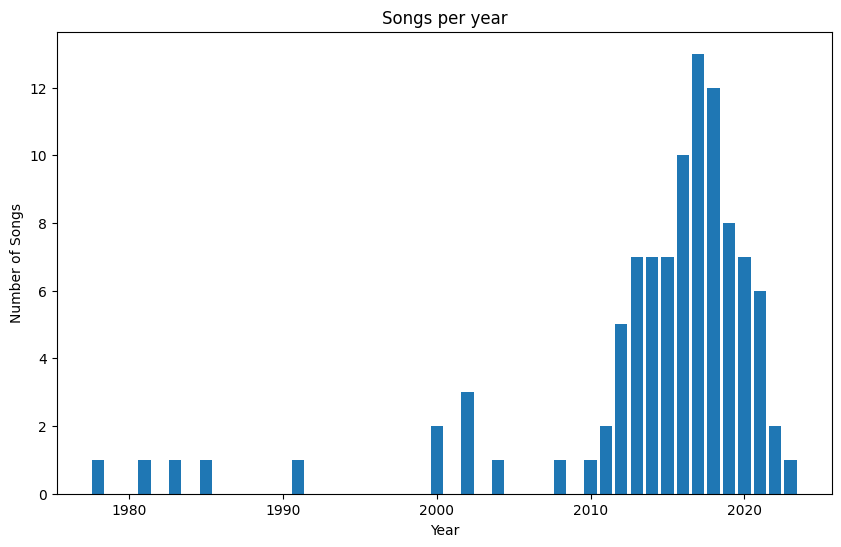

In [61]:
#visualize number of songs (track_name) per year
plt.figure(figsize=(10, 6))
plt.bar(grouped_by_year.index, grouped_by_year['track_name'])
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Songs per year');


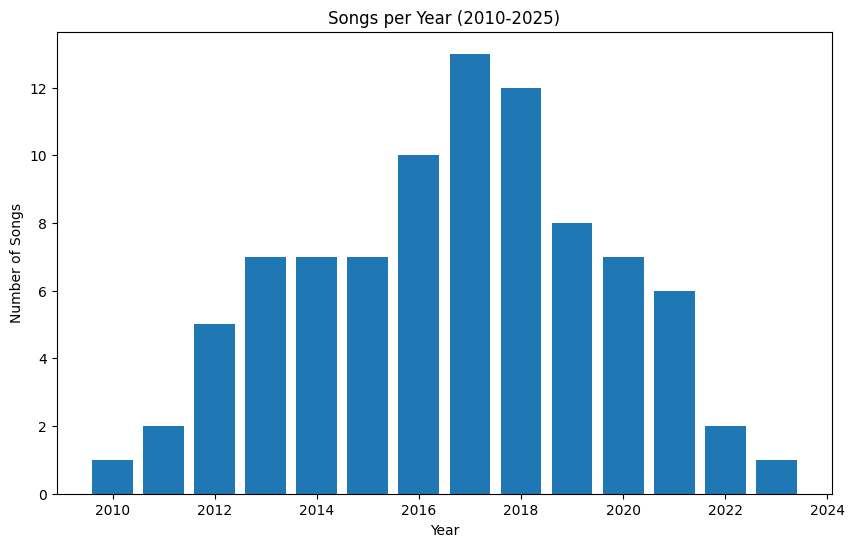

In [62]:
# Filter for the years 2010-2025
filtered_data = grouped_by_year[(grouped_by_year.index >= 2010) & (grouped_by_year.index <= 2025)]

plt.figure(figsize=(10, 6))
plt.bar(filtered_data.index, filtered_data["track_name"])  # Assuming 'track_count' is the column with song counts
plt.xlabel("Year")
plt.ylabel("Number of Songs")
plt.title("Songs per Year (2010-2025)")
plt.show()

In [68]:
print(df["track_album_release_year"].min())

1905


In [69]:
df[df["track_album_release_year"] == 1905]

,track_id,track_name,track_artist,track_popularity,track_album_name,track_album_release_year,duration_min,Genres,record_label,danceability,...,key_name,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Time Signature
51,003vvx7Niy0yvhvHt4a68B,Mr. Brightside,The Killers,85,Hot Fuss,1905,3.72,Rock,Island Records,35.20%,...,C#,-5.23,Major,7.47%,0.12%,0.00%,9.95%,23.60%,148.03,4
77,60a0Rd6pjrkxjPbaKzXjfq,In the End,Linkin Park,87,Hybrid Theory (Bonus Edition),1905,3.61,Rap,Warner Records,55.60%,...,D#,-5.87,Minor,5.84%,0.96%,0.00%,20.90%,40.00%,105.14,4


There might be a slight hiccup here 😆

In [70]:
#The Killers' Mr. Brightside was actually released in 2004, and Linkin Park's In the End, in 2000. Let's update those rows.

df.loc[df["track_name"] == "Mr. Brightside", "track_album_release_year"] = 2004
df.loc[df["track_name"] == "In the End", "track_album_release_year"] = 2000

In [71]:
print(df["track_album_release_year"].min())

1978


In [72]:
df[df["track_album_release_year"] == 1978]

,track_id,track_name,track_artist,track_popularity,track_album_name,track_album_release_year,duration_min,Genres,record_label,danceability,...,key_name,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Time Signature
87,5T8EDUDqKcs6OSOwEsfqG7,Don't Stop Me Now - Remastered 2011,Queen,81,Jazz (2011 Remaster),1978,3.49,Rock,EMI,55.90%,...,F,-5.276,Major,17.00%,4.75%,0.02%,77.60%,60.90%,156.3,4


In [73]:
print(df["track_album_release_year"].max())

2023


In [74]:
df[df["track_album_release_year"] == 2023]

,track_id,track_name,track_artist,track_popularity,track_album_name,track_album_release_year,duration_min,Genres,record_label,danceability,...,key_name,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Time Signature
82,7DSAEUvxU8FajXtRloy8M0,Flowers,Miley Cyrus,87,Endless Summer Vacation,2023,3.34,Pop,Columbia,70.60%,...,C,-4.775,Major,6.33%,5.84%,0.01%,2.32%,63.20%,118.05,4


##Popularity

In [75]:
track_popularity = df.groupby("track_name")["track_popularity"].mean()
track_popularity.sort_values(ascending=False).head(20)

track_name
I Wanna Be Yours            90.0
Sweater Weather             90.0
Cruel Summer                89.0
The Night We Met            88.0
Yellow                      88.0
Flowers                     87.0
When I Was Your Man         87.0
Locked out of Heaven        87.0
In the End                  87.0
As It Was                   87.0
Blinding Lights             87.0
Starboy                     87.0
Someone You Loved           86.0
Something Just Like This    86.0
Another Love                86.0
Every Breath You Take       86.0
goosebumps                  86.0
That's What I Like          86.0
lovely (with Khalid)        86.0
Viva La Vida                86.0
Name: track_popularity, dtype: float64

In [76]:
print("Average track popularity: ", round(track_popularity.mean(),2))
#print("Median track popularity: ", track_popularity.median())
print("Max track popularity: ", track_popularity.max())
print("Min track popularity: ", track_popularity.min())

Average track popularity:  81.05
Max track popularity:  90.0
Min track popularity:  52.0


##Track Duration

In [79]:
print("Average track duration: ", round(df["duration_min"].mean(),2))
#print("Median track duration: ", df["duration_min"].median())
print("Max track duration: ", df["duration_min"].max())
print("Min track duration: ", df["duration_min"].min())

Average track duration:  3.71
Max track duration:  5.92
Min track duration:  1.99


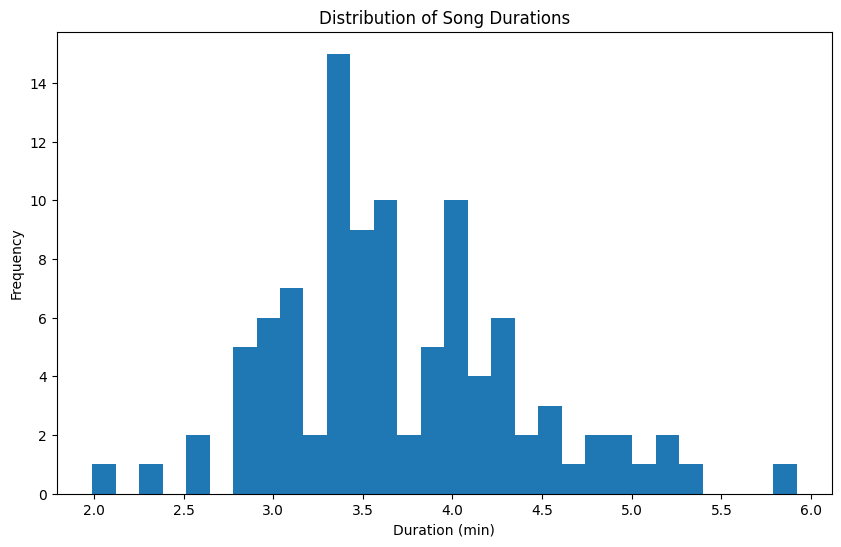

In [32]:
#histogram of duration of songs
plt.figure(figsize=(10, 6))
plt.hist(df['duration_min'], bins=30, color='#1f77b4')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.title('Distribution of Song Durations')
plt.show()

##Music & sonic Features

In [84]:
#In comparison, Obama playlists' average danceability is 63.65% -- almost identical!
print("Average track danceability: ", round(df["danceability"].mean(),2))
#print("Median Track danceability: ", round(df["danceability"].median(),2))
print("Max track danceability: ", round(df["danceability"].max(),2))
print("Min track danceability: ", round(df["danceability"].min(),2))


Average track danceability:  63.81
Max track danceability:  90.8
Min track danceability:  35.1


In [85]:
#In comparison, Obama playlists' average energy is xxx.
print("Average track energy: ", round(df["energy"].mean(),2))
#print("Median Track energy: ", round(df["energy"].median(),2))
print("Max track energy: ", round(df["energy"].max(),2))
print("Min track energy: ", round(df["energy"].min(),2))

Average track energy:  62.74
Max track energy:  92.2
Min track energy:  26.4


In [86]:
#In comparison, Obama playlists' average loudness is -8.2: here, the difference shows there are more "non-commercial" songs in Obama's playlists.
print("Average track loudness: ", round(df["loudness"].mean(),2))
#print("Median Track loudness: ", round(df["loudness"].median(),2))
print("Max track loudness: ", round(df["loudness"].max(),2))
print("Min track loudness: ", round(df["loudness"].min(),2))

Average track loudness:  -6.2
Max track loudness:  -2.28
Min track loudness:  -10.96


In [87]:
#In comparison, Obama playlists exhibits a slightly happier feeling, with an average valence of 55%.
print("Average track valence: ", round(df["valence"].mean(),2))
#print("Median Track valence: ", round(df["valence"].median(),2))
print("Max track valence: ", round(df["valence"].max(),2))
print("Min track valence: ", round(df["valence"].min(),2))

Average track valence:  48.91
Max track valence:  96.9
Min track valence:  5.9


In [88]:
print("Average track liveness: ", round(df["liveness"].mean(),2))
#print("Median Track liveness: ", round(df["liveness"].median(),2))
print("Max track liveness: ", round(df["liveness"].max(),2))
print("Min track liveness: ", round(df["liveness"].min(),2))

Average track liveness:  16.1
Max track liveness:  77.6
Min track liveness:  2.32


In [89]:
print("Average track speechiness: ", round(df["speechiness"].mean(),2))
#print("Median Track speechiness: ", round(df["speechiness"].median(),2))
print("Max track speechiness: ", round(df["speechiness"].max(),2))
print("Min track speechiness: ", round(df["speechiness"].min(),2))

Average track speechiness:  8.59
Max track speechiness:  43.8
Min track speechiness:  2.32


In [91]:
#An overwhelming maority of 4/4 songs, which is to be expected with most streamed songs!
print(df["Time Signature"].value_counts())

Time Signature
4    98
3     2
Name: count, dtype: int64


In [98]:
df["mode"].value_counts()

mode
Major    65
Minor    35
Name: count, dtype: int64

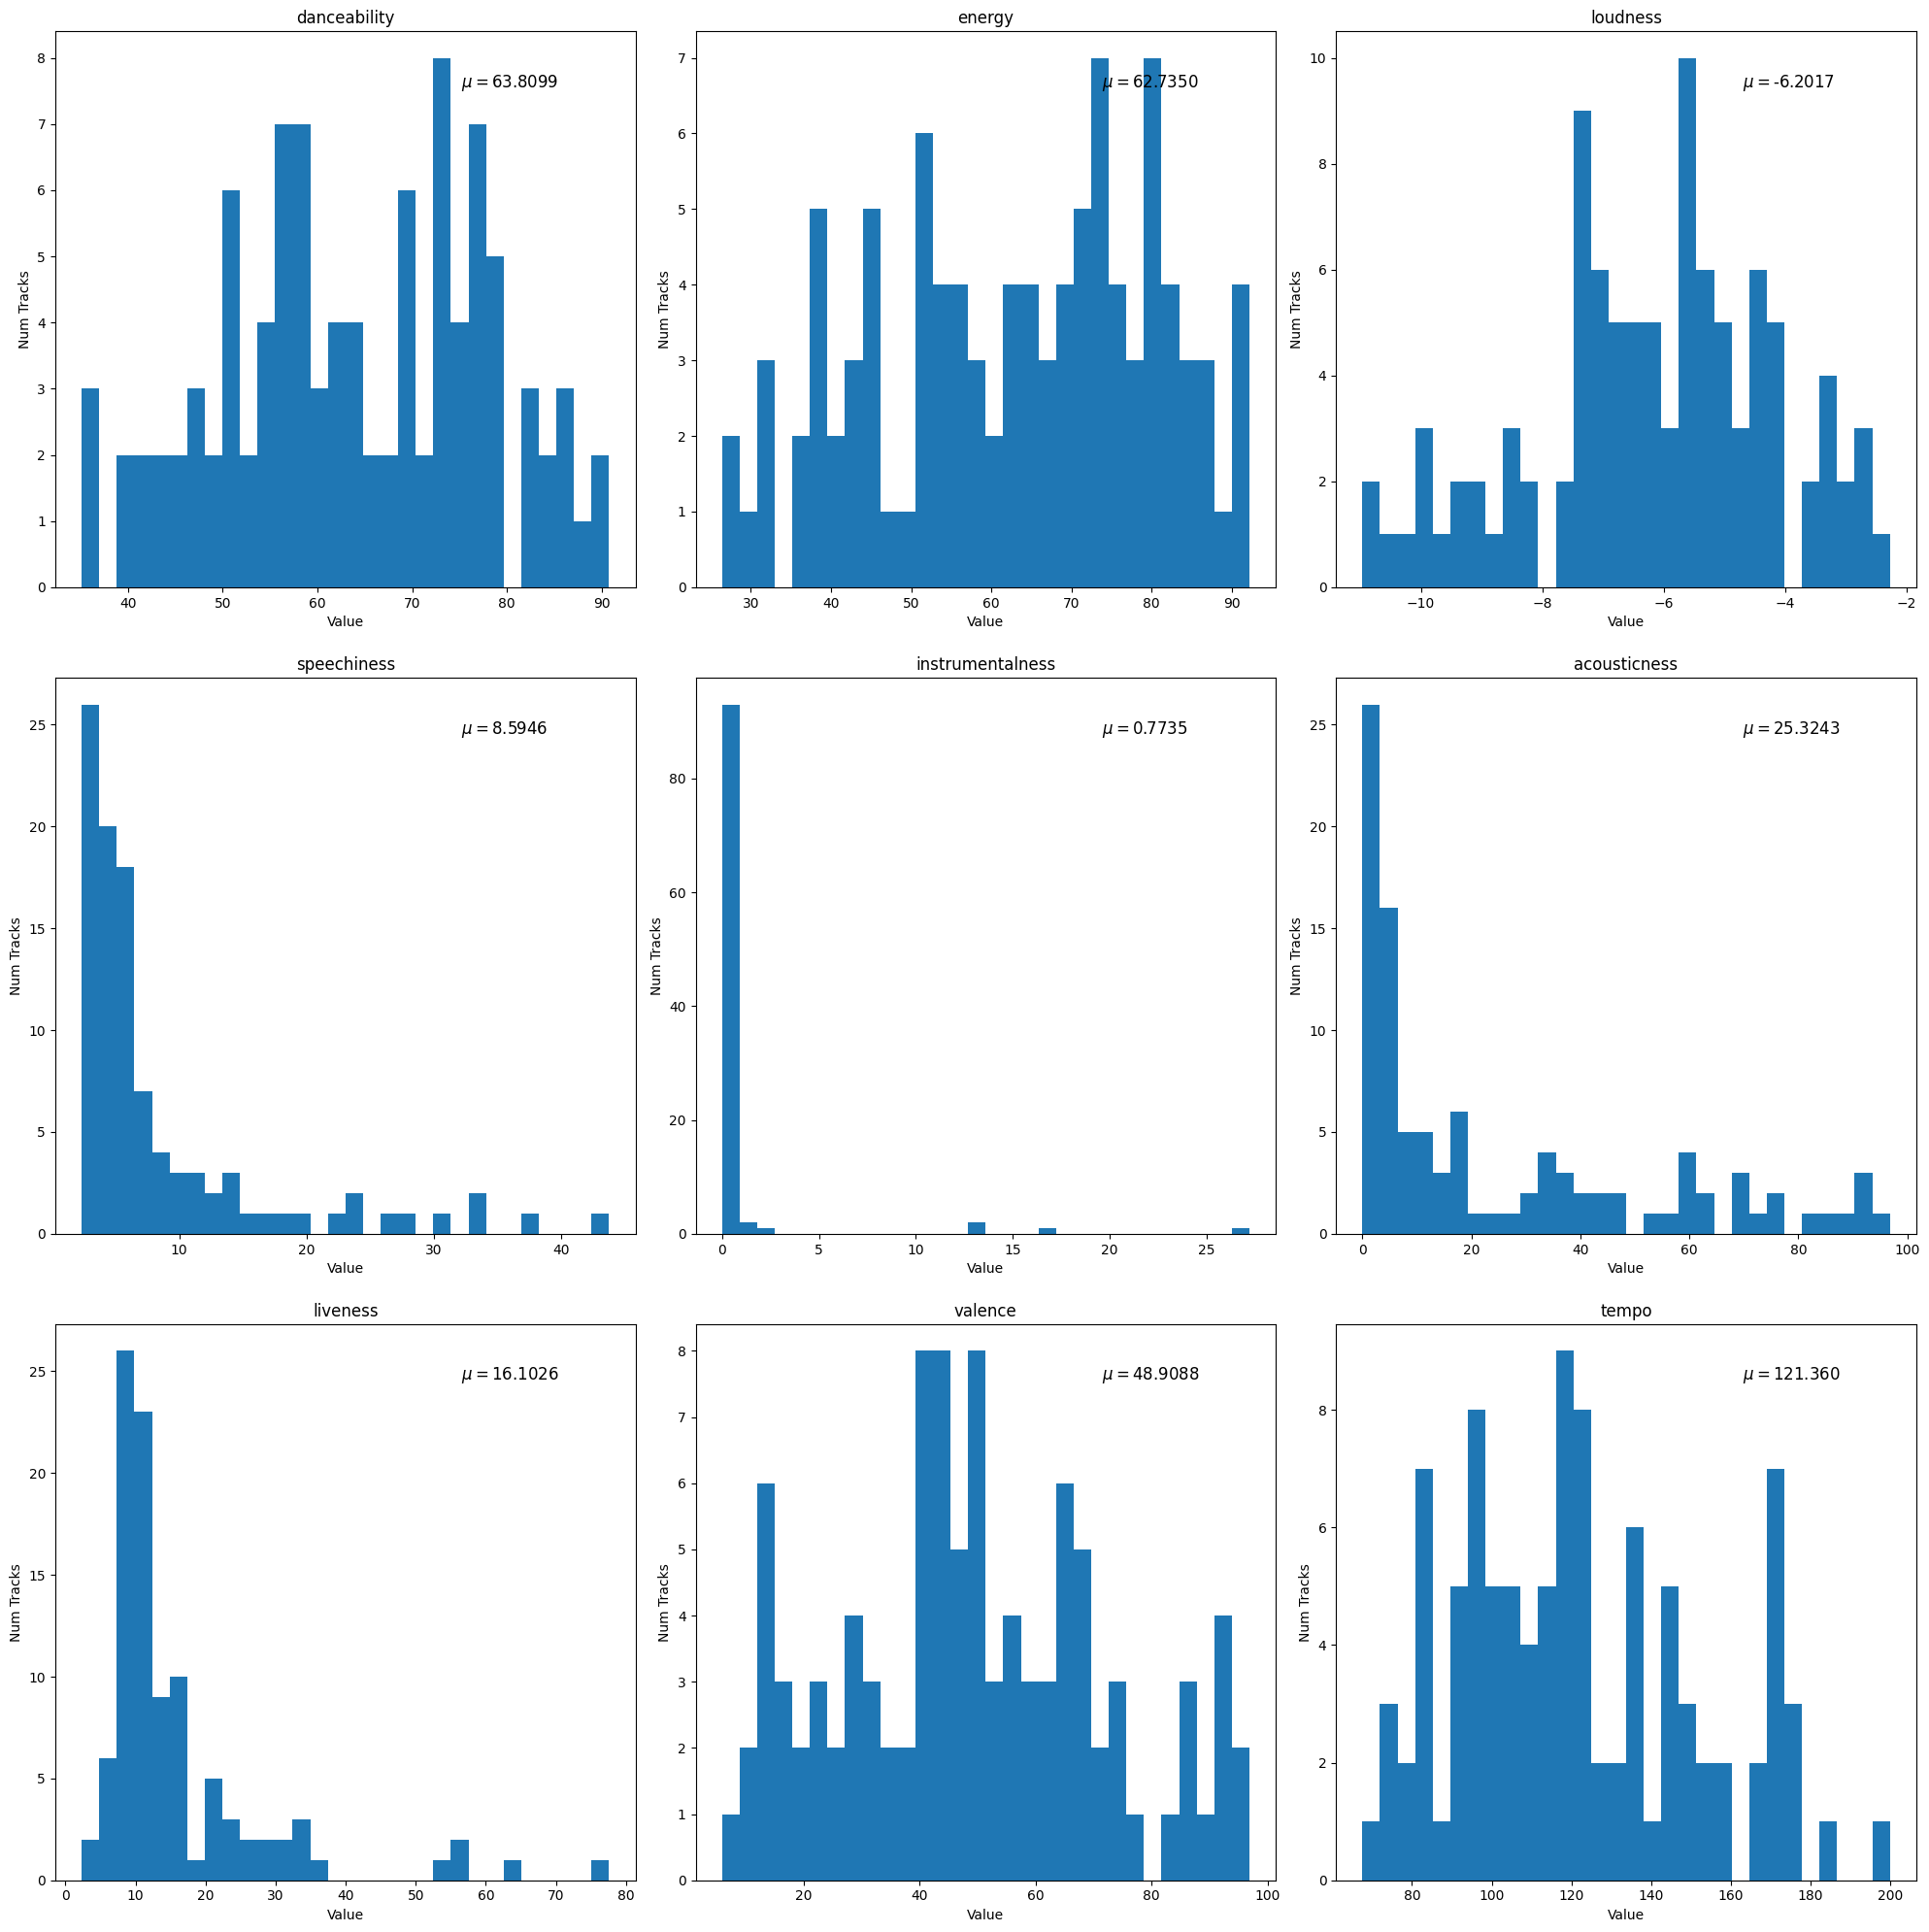

In [100]:
plt.figure(figsize=(20,20))

for i,category in enumerate(['danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'acousticness', 'liveness', 'valence', 'tempo']):
    plt.subplot(3, 3, i+1)
    plt.hist(df[category], bins=30)
    plt.text(plt.xlim()[1] - (plt.xlim()[1] - plt.xlim()[0])*0.3,
                plt.ylim()[1]*0.9, r'$\mu=$'+str(df[category].mean())[:7], fontsize=12)
    plt.xlabel('Value')
    plt.ylabel('Num Tracks')
    plt.title(category)

plt.tight_layout(h_pad=2)

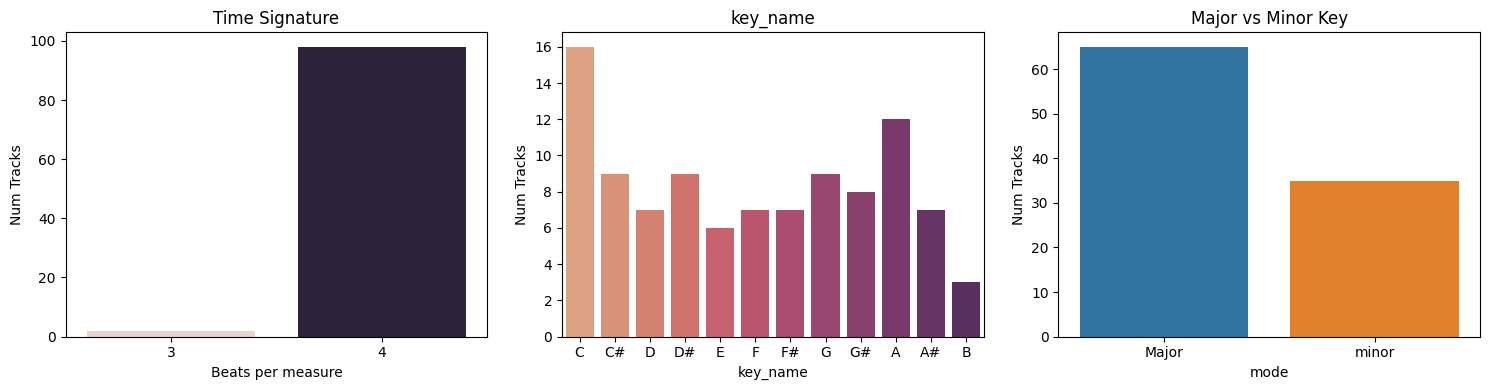

In [101]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.countplot(df, x='Time Signature', hue='Time Signature', legend=False)
plt.xlabel('Beats per measure')
plt.ylabel('Num Tracks')
plt.title('Time Signature')

plt.subplot(1, 3, 2)
sns.countplot(df, x='key_name', hue='key_name', palette='flare', legend=False)
plt.xticks(ticks=plt.xticks()[0], labels=['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.ylabel('Num Tracks')
plt.title('key_name')

plt.subplot(1, 3, 3)
sns.countplot(df, x='mode', hue='mode', legend=False)
plt.xticks(ticks=plt.xticks()[0], labels=['Major', 'minor'])
plt.ylabel('Num Tracks')
plt.title('Major vs Minor Key')

plt.tight_layout(w_pad=2)
plt.show()